In [33]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

## Contexto

Los datos fueron recolectados y dispuestos por “National Institute of Diabetes and Digestive and Kidney Diseases”. El conjunto de datos a sido filtrado y se han seleccionado instancias para evaluar pacientes pertenecientes al grupo indígena Pima (subgrupo de nativos Americanos).

Se consideran las siguientes variable para evaluar si un paciente tiene diabetes o no:

* **embarazo**: Número de embarazos
* **glucosa**: Concentración de glucosa en una prueba de tolerancia oral
* **bp**: Presión sanguínea (mmHg)
* **piel**: Espesor del pliegue cutáneo del tríceps (mm)
* **insulina**: Insulina en la sangre
* **bmi**: Indice de masa muscular
* **linaje**: Linaje de diabetes familar
* **edad**: Años
* **label**: Etiqueta 1 si tiene diabetes 0 si no

### Importar datos y definir variables

In [32]:
r = "pima-indians-diabetes.csv"
col_names = ['embarazo', 'glucosa', 'bp', 'piel', 'insulina', 'bmi', 'linaje', 'edad', 'label']
datos = pd.read_csv(r,sep=",", header=None, names=col_names)
datos.head()

,embarazo,glucosa,bp,piel,insulina,bmi,linaje,edad,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploración de datos

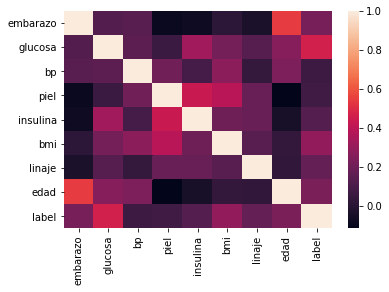

In [35]:
corr = datos.corr()
sns.heatmap(corr, xticklabels=corr.columns, 
         yticklabels=corr.columns)
plt.show()

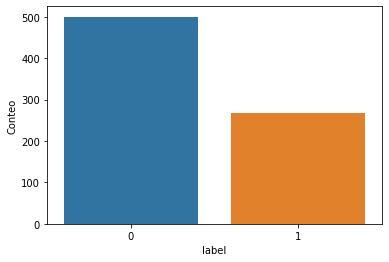

In [44]:
Data = pd.DataFrame(np.array([[0,500],[1,268]]),columns=["label","Conteo"])
sns.barplot(x="label", y="Conteo", data=Data)
plt.show()

In [159]:
# Seleccionar variables independiente
X = datos.drop(["label"],axis=1)
nombres = X.columns

# Seleccionar variables dependientes
y = datos["label"]

# Particionar datos de prueba y entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Generación del árbol

In [182]:
Dtree = DecisionTreeClassifier(criterion="gini", max_depth=4, splitter="random")
Dtree.fit(X_train, y_train)

with open("arbol_1.dot","w") as f:
    f = tree.export_graphviz(Dtree, out_file=f, filled=True, special_characters=True,
                            feature_names = nombres,class_names=['0','1'])

Predict = Dtree.predict(X_test)    
print(classification_report(y_test,Predict))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       142
           1       0.76      0.28      0.41        89

    accuracy                           0.69       231
   macro avg       0.72      0.61      0.60       231
weighted avg       0.71      0.69      0.64       231



### Evaluación de desempeño

In [51]:
print(confusion_matrix(y_test,Predict))
print(classification_report(y_test,Predict))

[[124  22]
 [ 31  54]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



### Pronóstico con valores de prueba

In [31]:
Predict = Dtree.predict(X_test)

Pronos=[]
Observ=[]

# Se crea un contador para saber el número de veces que una clase es pronosticada
for i in range(0,2):
    p = 0
    for j in Predict:
        if i == j:
            p += 1
    Pronos.append(p)
    
# Se crea un contador para saber el número de veces que una clase es observada
for i in range(0,2):
    o = 0
    for j in y_test:
        if i == j:
            o += 1
    Observ.append(o)

print("Diabetes pornósticada y observada:")
for i in range(len(Pronos)):
    print(" Diabetes %s : %s - %s" %(i,Pronos[i],Observ[i]))


Diabetes pornósticada y observada:
 Diabetes 0 : 155 - 146
 Diabetes 1 : 76 - 85


### Importancia de variables

In [25]:
b = Dtree.feature_importances_
a = []
for i in range(4):
    a.append(b[i])
impor = pd.DataFrame(list(zip(nombres,a)),columns=["Variable","Importancia de Gini"])

print("Importancia de las variables:")
impor.sort_values(by="Importancia de Gini",ascending=False).head()

Importancia de las variables:


,Variable,Importancia de Gini
1,glucose,0.562837
0,pregnant,0.000000
2,bp,0.000000
3,skin,0.000000


In [27]:
Pronos = np.asarray(Pronos)
Observ = np.asarray(Observ)
A = y_test==Predict
V_count = 0

for i in A:
    if i==True:
        V_count+=1
        
Prev = V_count/len(Predict) # prev...alencia
print("El %.2f"%(Prev*100) + "% de los vinos estuvieron bien clasificados")

El 77.06% de los vinos estuvieron bien clasificados
